# Pyber Summary Analysis

* Overall findings in the data show that Urban rides account for a greater proportion of overall rides, however yielding, on average, lower cost per ride; while Rural rides account for the smallest proportion of rides but more of these rides inversely yield the highest on average cost per ride.   

* Of all all combined rides totaling to $63,538.64, Urban rides account for 62.7% of Total Fare Costs when compared to Suburban (30.5%) and Rural (6.8%) rides.

* The data shows that of all combined type of rides, totaling to 2,375, Urban rides account for 68.4% of Total Rides, Suburban rides account for 26.3% of rides and Rural rides account for 5.3% of rides.

* Finally, a total of 2,973 Drivers have been identified in the data. The data shows that 80.9% of Drivers are found to drive in Urban city types, 16.5% in Suburban areas and 2.6% in Rural areas.

In [196]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

#city_data_df.head()
#ride_data_df.head()

# Combine the data into a single dataset
pyber_combined = pd.merge(ride_data_df, city_data_df, how="left", on=["city"])

# Display the data table for preview
pyber_combined.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

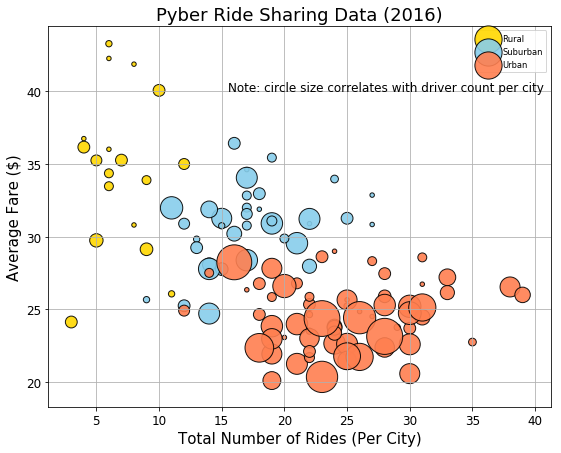

<Figure size 432x288 with 0 Axes>

In [197]:
# Group rider by city type
grouped_rcount_type = pyber_combined.groupby(["type","city"])
# Avg fare ($) Per City, Total Number of Rides Per City, Total Number of Drivers Per City
avg_fare = grouped_rcount_type["fare"].mean()
rider_count = grouped_rcount_type["ride_id"].count()
driver_count = grouped_rcount_type["type","city","driver_count"].head(1).set_index(['type','city']).sort_values(["type","city"],ascending = True)*20
# Driver_count.head(10)

# Prepare data for plot
fig.plt = plt.subplots(figsize = (9,7))
color = ["gold","skyblue","coral"]
d_index = driver_count.index.levels[0]
d_index.columns = ["City Types"]
for i in range(len(d_index)):
    plt.scatter(rider_count[d_index[i]],avg_fare[d_index[i]],s=driver_count, label=d_index[i], marker = "o",facecolor = color[i],edgecolor="k", alpha=.90)
#driver_count
plt.grid()
plt.xlabel("Total Number of Rides (Per City)", fontsize = 15) ; plt.ylabel("Average Fare ($)", fontsize = 15)
plt.xticks(size = 12) ; plt.yticks(size = 12)
plt.title("Pyber Ride Sharing Data (2016)", fontsize = 18)
plt.legend(fontsize = "small", loc = "best", fancybox=True)
plt.text(15.5, 40, "Note: circle size correlates with driver count per city", fontsize="large", color="k")
plt.show();
plt.savefig("Image_Scatterplot.jpg")

# For future look into adding a second legend box with proportional size counts usning 
#handles, labels=(prop="Sizes", alpha=0.6)
#plt.legend2(handles, labels=driver_count, loc = "best", fancybox=True)


## Total Fares by City Type

In [198]:
# Calculate Type Percents, use groupby city type and fare
fare_city = pyber_combined.groupby(["type"])["fare"].sum()
fare_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

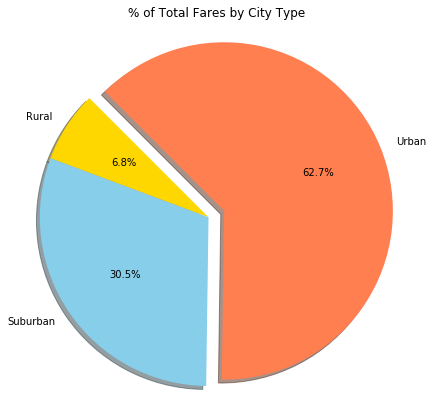

<Figure size 432x288 with 0 Axes>

In [199]:
# Build Pie Chart
#dataset 
fig,fares = plt.subplots(figsize =(7,7))
#numbers = [0.06811493, .30463872, .62724556]
fare_city = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares by City Type")
plt.pie(numbers, explode=explode, labels = fare_city, colors = colors, autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("Image_Fares_CityType.jpg")

## Total Rides by City Type

In [200]:
# Calculate Ride Percents
# Calculate Type Percents, use groupby city type and ride id
rides_city = pyber_combined.groupby(["type"])["ride_id"].count()
rides_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

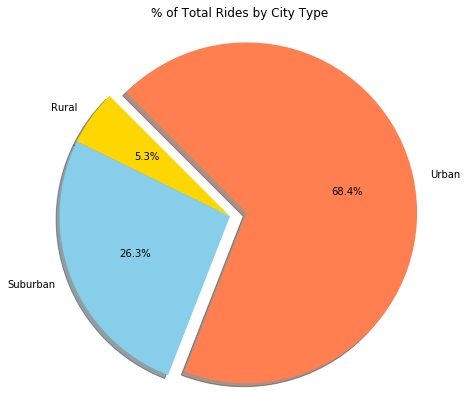

<Figure size 432x288 with 0 Axes>

In [201]:
# Build Pie Chart
#dataset 
fig,rides=plt.subplots(figsize =(7,7))
ride_city = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
#rides_city.plot(kind="pie")
explode = (0, 0, 0.1)
plt.title("% of Total Rides by City Type")
plt.pie(rides_city, explode=explode, labels = ride_city, colors = colors, autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("Image_Rides_CityType.jpg")

## Total Drivers by City Type

In [202]:
# Calculate Driver Percents
# Calculate Type Percents, use groupby city type and driver counts
#driver_city = pyber_combined.groupby(["type"])["driver_count"].count()
driver_city = grouped_rcount_type["type","city","driver_count"].head(1)[["type","driver_count"]].groupby("type").sum()["driver_count"]
driver_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

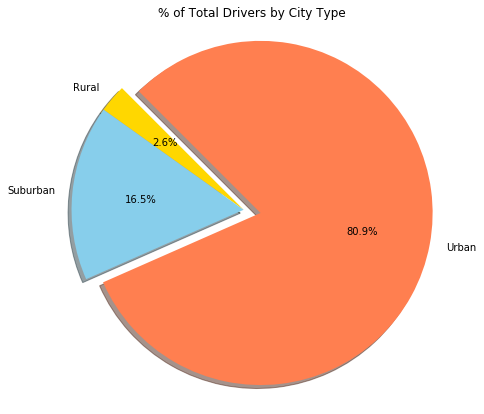

<Figure size 432x288 with 0 Axes>

In [203]:
# Show Figure
# Build Pie Chart
#dataset 
fig,drivers = plt.subplots(figsize =(7,7))
label_city = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers by City Type")
plt.pie(driver_city,explode=explode,labels = label_city, colors = colors, autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("Image_Drivers_CityType.jpg")